In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(5)

,summary_date,app_id,app_type,app_name,campaign_id,campaign_name,ad_id,ad_name,impressions,clicks,installs,spend,event_name,events_d0,events_d7,unique_events_d0,unique_events_d7
0,2022.06.14,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16L8hGR,Super AD 16L8hGR,82.0,46.0,NaN,0.00455,super_event,NaN,NaN,NaN,NaN
1,2022.07.10,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16z49oF,Super AD 16z49oF,1942.0,1226.0,2.0,0.88920,super_event,0.0,0.0,0.0,0.0
2,2022.07.05,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16DpJ5e,Super AD 16DpJ5e,116.0,2.0,NaN,0.00715,super_event,NaN,NaN,NaN,NaN
3,2022.06.01,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16sutOl,Super AD 16sutOl,15550.0,18.0,4.0,0.52455,super_event,0.0,0.0,0.0,0.0
4,2022.07.25,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16ZEk4H,Super AD 16ZEk4H,0.0,0.0,2.0,0.00000,super_event,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   summary_date      1570 non-null   object 
 1   app_id            1570 non-null   object 
 2   app_type          1570 non-null   object 
 3   app_name          1570 non-null   object 
 4   campaign_id       1570 non-null   object 
 5   campaign_name     1570 non-null   object 
 6   ad_id             1453 non-null   object 
 7   ad_name           1453 non-null   object 
 8   impressions       1489 non-null   float64
 9   clicks            1489 non-null   float64
 10  installs          826 non-null    float64
 11  spend             1489 non-null   float64
 12  event_name        1570 non-null   object 
 13  events_d0         826 non-null    float64
 14  events_d7         826 non-null    float64
 15  unique_events_d0  826 non-null    float64
 16  unique_events_d7  826 non-null    float64


In [6]:
df.summary_date = pd.to_datetime(df.summary_date)

In [7]:
df.head(5)

,summary_date,app_id,app_type,app_name,campaign_id,campaign_name,ad_id,ad_name,impressions,clicks,installs,spend,event_name,events_d0,events_d7,unique_events_d0,unique_events_d7
0,2022-06-14,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16L8hGR,Super AD 16L8hGR,82.0,46.0,NaN,0.00455,super_event,NaN,NaN,NaN,NaN
1,2022-07-10,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16z49oF,Super AD 16z49oF,1942.0,1226.0,2.0,0.88920,super_event,0.0,0.0,0.0,0.0
2,2022-07-05,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16DpJ5e,Super AD 16DpJ5e,116.0,2.0,NaN,0.00715,super_event,NaN,NaN,NaN,NaN
3,2022-06-01,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16sutOl,Super AD 16sutOl,15550.0,18.0,4.0,0.52455,super_event,0.0,0.0,0.0,0.0
4,2022-07-25,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16ZEk4H,Super AD 16ZEk4H,0.0,0.0,2.0,0.00000,super_event,0.0,0.0,0.0,0.0


In [8]:
df_metrics = df.groupby(by=['campaign_name'])[['impressions','clicks','installs','spend']].sum()

In [9]:
df_metrics['CTR Percent'] = (df_metrics.clicks / df_metrics.impressions) * 100
df_metrics['CPI Percent'] = (df_metrics.spend / df_metrics.installs) * 100

In [10]:
df_metrics.replace([np.inf, -np.inf], np.nan, inplace=True)
df_metrics = df_metrics.fillna(0)

**Metrics by Campaign Name

In [11]:
df_metrics.round(2)

,impressions,clicks,installs,spend,CTR Percent,CPI Percent
campaign_name,,,,,,
Super campaign 10,0.0,5429764.0,213682.0,57194.67,0.00,26.77
Super campaign 13,0.0,0.0,2.0,0.00,0.00,0.00
Super campaign 16,245177026.0,2132984.0,28776.0,18314.59,0.87,63.65
Super campaign 4,0.0,0.0,26.0,0.00,0.00,0.00
Super campaign 5,0.0,0.0,1072.0,0.00,0.00,0.00
Super campaign 6,95681244.0,847818.0,3776.0,1422.20,0.89,37.66
Super campaign 9,0.0,0.0,541224.0,0.00,0.00,0.00


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Super campaign 10'),
  Text(1, 0, 'Super campaign 13'),
  Text(2, 0, 'Super campaign 16'),
  Text(3, 0, 'Super campaign 4'),
  Text(4, 0, 'Super campaign 5'),
  Text(5, 0, 'Super campaign 6'),
  Text(6, 0, 'Super campaign 9')])

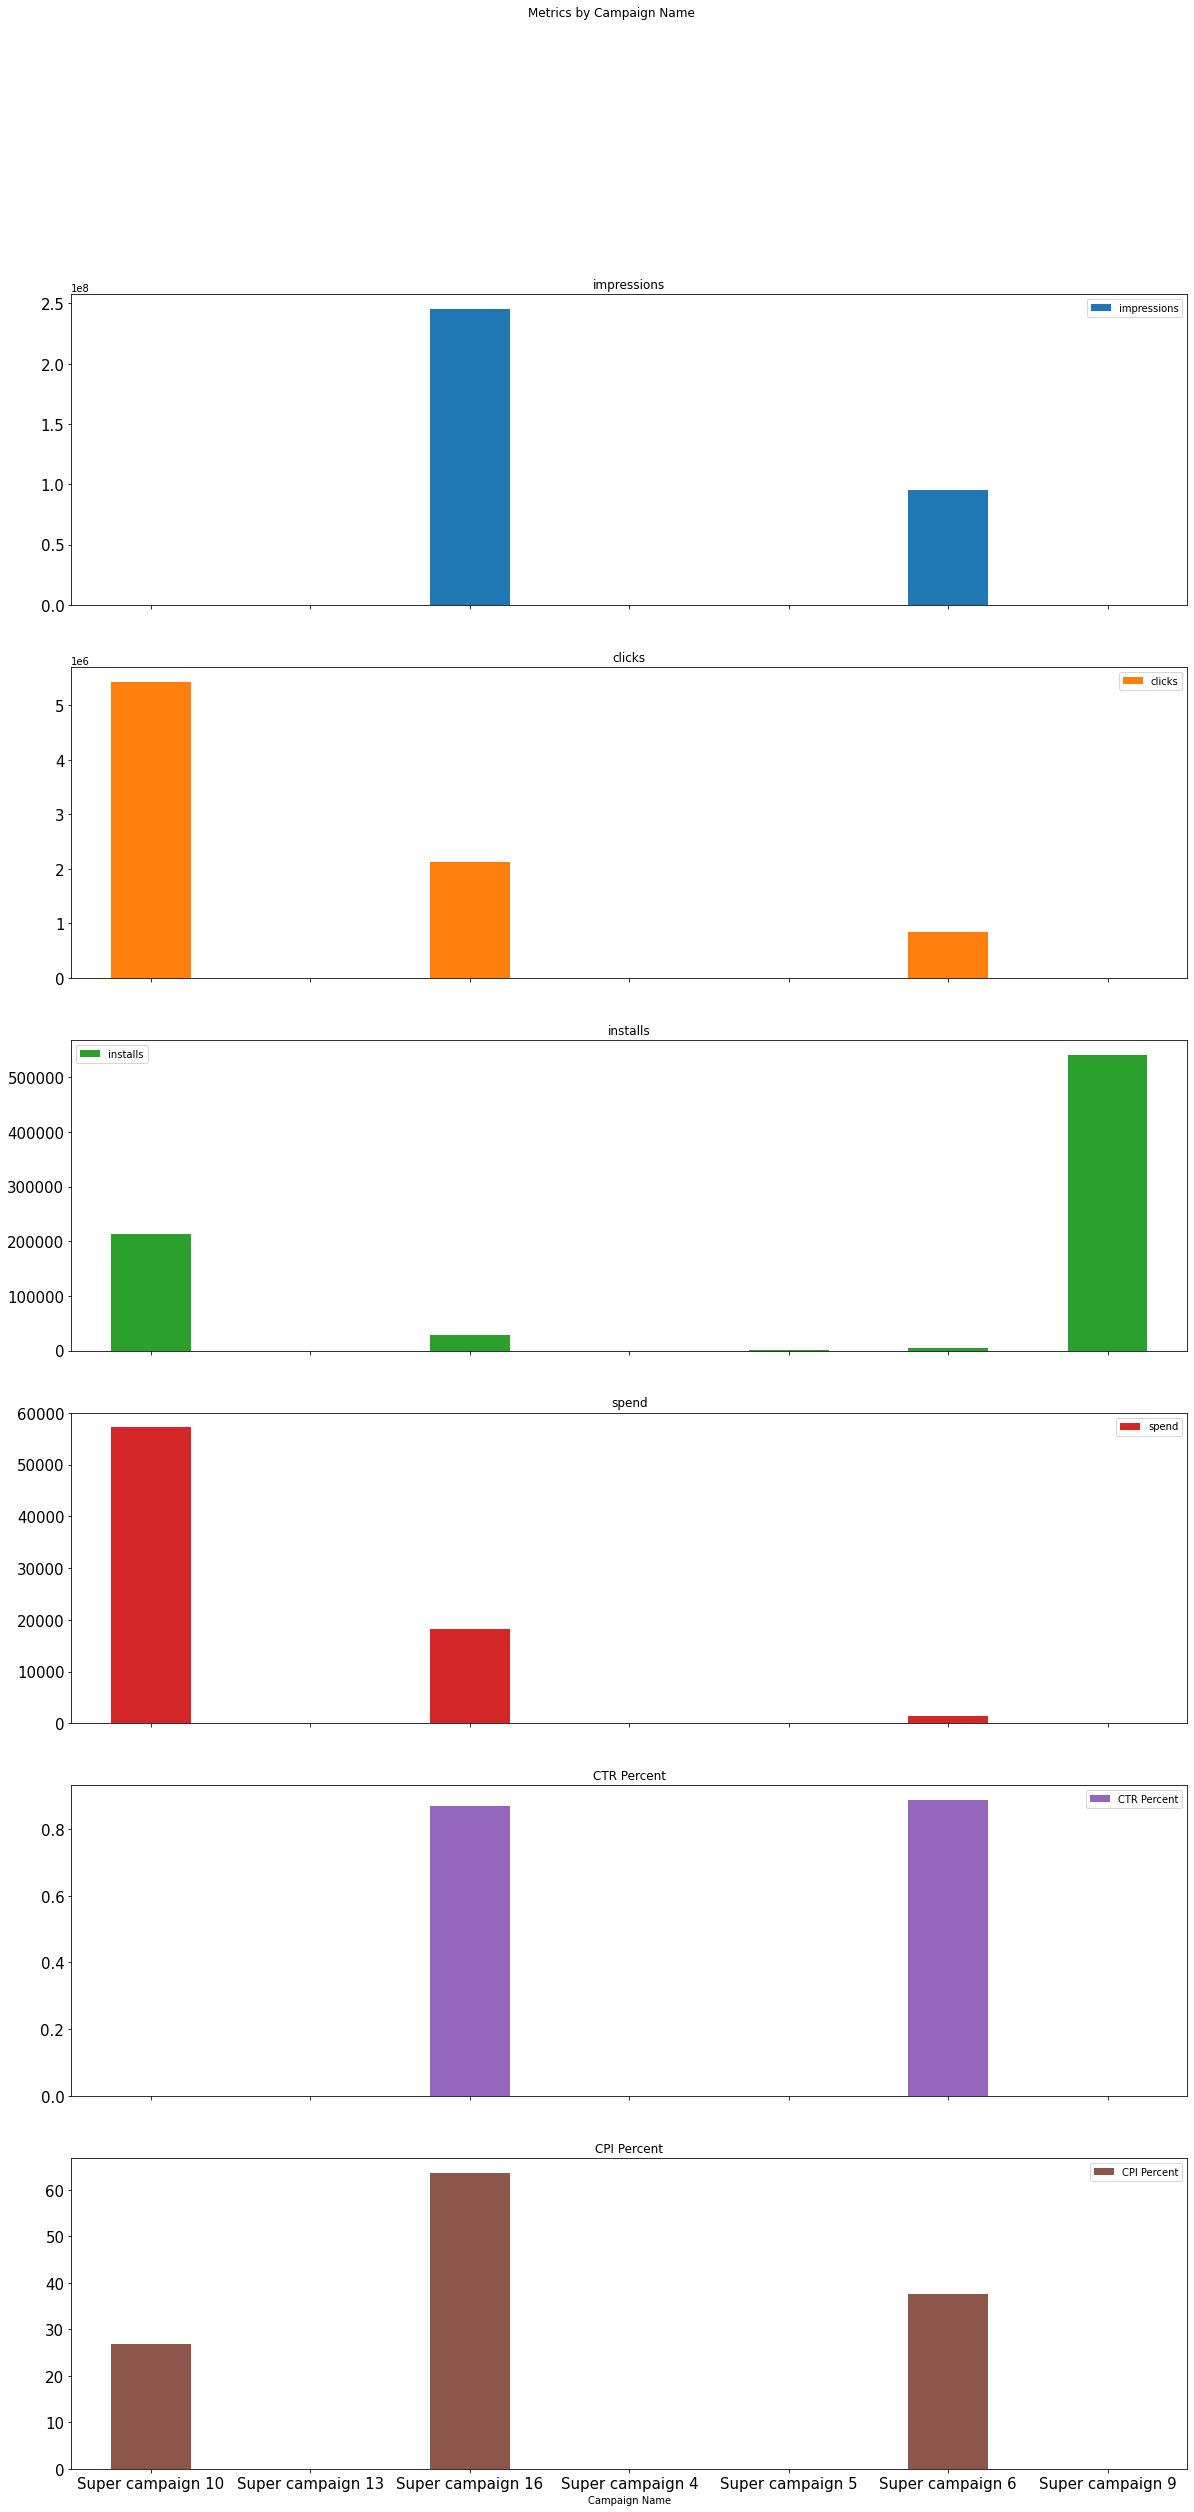

In [12]:
df_metrics.plot.bar(subplots=True, figsize=(20,40), title='Metrics by Campaign Name', xlabel='Campaign Name', fontsize=15)
plt.xticks(rotation=0)

**Exploratory Analysis

In [13]:
df.shape

(1570, 17)

In [14]:
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
summary_date,datetime64[ns]
app_id,object
app_type,object
app_name,object
campaign_id,object
campaign_name,object
ad_id,object
ad_name,object
impressions,float64


In [15]:
cat_feature = df.columns[df.dtypes == 'object']
num_feature = df.columns[df.dtypes != 'object']

In [16]:
df[num_feature].describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
impressions,1489.0,228917.575554,622374.418693,0.0,48.0000,4984.00000,74244.00000,5825656.000
clicks,1489.0,5648.466085,40067.794988,0.0,6.0000,90.00000,1288.00000,1215918.000
installs,826.0,954.670702,5317.702577,2.0,4.0000,12.00000,42.00000,83240.000
spend,1489.0,51.666529,294.343442,0.0,0.0117,0.68965,9.28655,4803.045
events_d0,826.0,4.322034,10.845378,0.0,0.0000,0.00000,2.00000,82.000
events_d7,826.0,5.491525,14.054200,0.0,0.0000,0.00000,4.00000,116.000
unique_events_d0,826.0,3.573850,8.846297,0.0,0.0000,0.00000,2.00000,58.000
unique_events_d7,826.0,4.210654,10.448334,0.0,0.0000,0.00000,2.00000,68.000


In [17]:
df[cat_feature].describe().T
df.describe(include='O').T

,count,unique,top,freq
app_id,1570,1,com.super.app,1570
app_type,1570,1,android,1570
app_name,1570,1,Super App 2000,1570
campaign_id,1570,7,campaign_16,1373
campaign_name,1570,7,Super campaign 16,1373
ad_id,1453,54,ad_6,61
ad_name,1453,54,Super AD 6,61
event_name,1570,1,super_event,1570


In [18]:
df.campaign_id.value_counts()

campaign_16    1373
campaign_6       61
campaign_10      61
campaign_9       43
campaign_5       20
campaign_4       11
campaign_13       1
Name: campaign_id, dtype: int64

<AxesSubplot:title={'center':'Campaign Count '}>

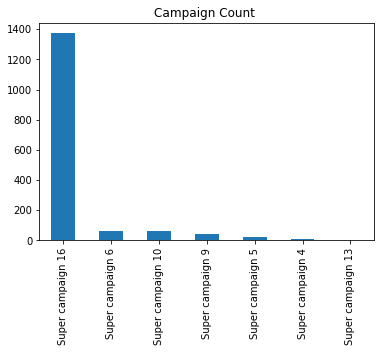

In [19]:
df['campaign_name'].value_counts().plot(kind='bar', title='Campaign Count ')